### Figure 4
 

In [1]:
## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import pandas as pd
import seaborn as sns
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jybilci6 because the default path (/home/ronaldo/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## All areas

In [2]:
pathData = '/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/'
pathFln = '/home/ronaldo/github/ProjectUfabc/MouseKennedySNN/Data/Connectome/Kennedy.mat'

# Number of areas
Nareas=7
# Numver of trials
Ntrials=10

#### FLN

In [3]:
# Structural Connectivity
# Fln
conn = loadmat(pathFln)
fln=conn['Fln']

#### GPDC Total

In [4]:
# Gpdc (Downsample 1kHz)
gpdcMatrixTotal=np.zeros((19,19,10)) #(i->j)

Seeds=10
for i in range(Seeds):
    # GPDC
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdc.npz')
    gpdc=data['arr_1']
    gpdcMatrixTotal[:,:,i]=np.max(gpdc[:,:,:],axis=2).T


#### GPDC pairwise

In [5]:
# Gpdc (Downsample 1kHz)
gpdcMatrixPair=np.zeros((19,19,10)) #(i->j)

Seeds=10
for i in range(Seeds):
    # GPDC
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdcPairwise.npz')
    gpdcMatrixPair[:,:,i]=np.max(data['arr_1'],axis=2)    # Não precisa inverter


#### GPDC Visual

In [6]:
# Gpdc (Downsample 1kHz)
gpdcMatrixVisual=np.zeros((7,7,10)) #(i->j)

Seeds=10
for i in range(Seeds):
    # GPDC
    dataVisual = np.load(pathData+'/Seed'+str(i+1)+'/gpdc_visual.npz')
    gpdcMatrixVisual[:,:,i]=dataVisual['arr_0']    # Não precisa inverter

In [7]:

areasVisual=dataVisual['arr_2']

# Define FLN visual

flnVisual=fln[areasVisual,:]
flnVisual=flnVisual[:,areasVisual]

# Define GPDC total visual

gpdcTotalVisual=gpdcMatrixTotal[areasVisual,:,:]
gpdcTotalVisual=gpdcTotalVisual[:,areasVisual,:]

# Define GPDC pair visual

gpdcPairVisual=gpdcMatrixPair[areasVisual,:,:]
gpdcPairVisual=gpdcPairVisual[:,areasVisual,:]


### Plot GPDC Total vc FLN (Visual)

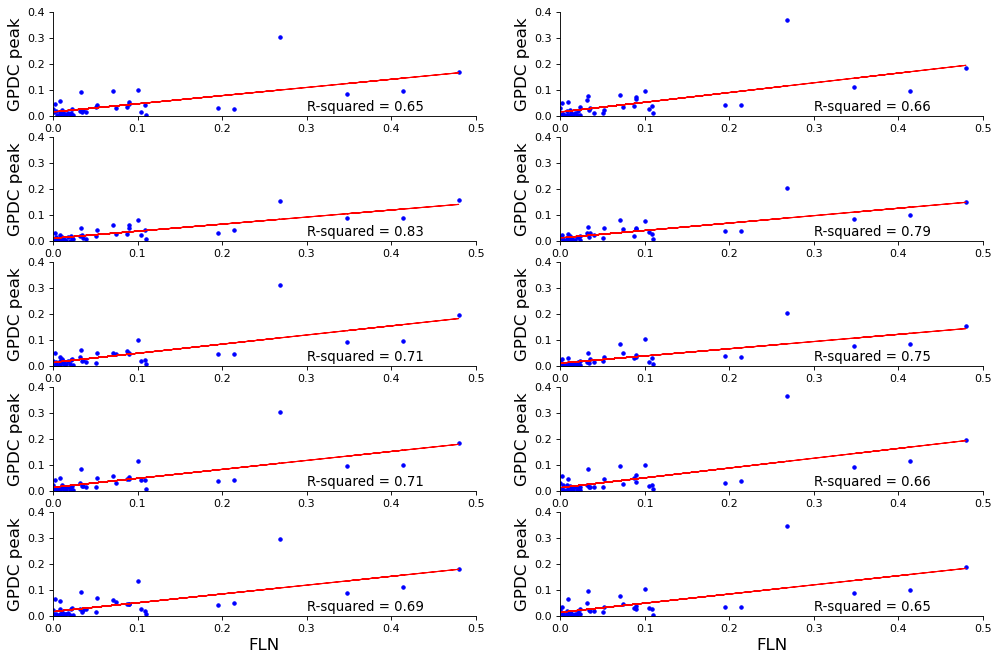

In [8]:
fig=plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# create data structure for scatter plot

# correlation
listCorrelationVisualTotal=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    listFln=[]
    listGpdc=[]

    for i in range(7):
        for j in range(7):
            if i!=j:
                listFln.append(flnVisual[i,j])
                listGpdc.append(gpdcTotalVisual[i,j,seed])

    # Plot scatter plot
    plt.subplot(5,2,seed+1) 
    plt.plot(listFln,listGpdc,'.b')
    
    # # linear regression
    X = np.array(listFln)
    y = np.array(listGpdc)
    X = X.reshape(len(X), 1)
    y = y.reshape(len(y), 1)
    reg = LinearRegression().fit(X, y) 
    plt.plot(X, reg.predict(X), color='red', linewidth=1)
    plt.text(0.3, 0.02, 'R-squared = %0.2f' % np.sqrt(r2_score(y, reg.predict(X))),fontsize=12)
    plt.ylabel('GPDC peak',fontsize=15)
    plt.xlabel('FLN',fontsize=15)
    plt.ylim([0, 0.4])
    plt.xlim([0, 0.5])

    listCorrelationVisualTotal.append(np.sqrt(r2_score(y, reg.predict(X))))

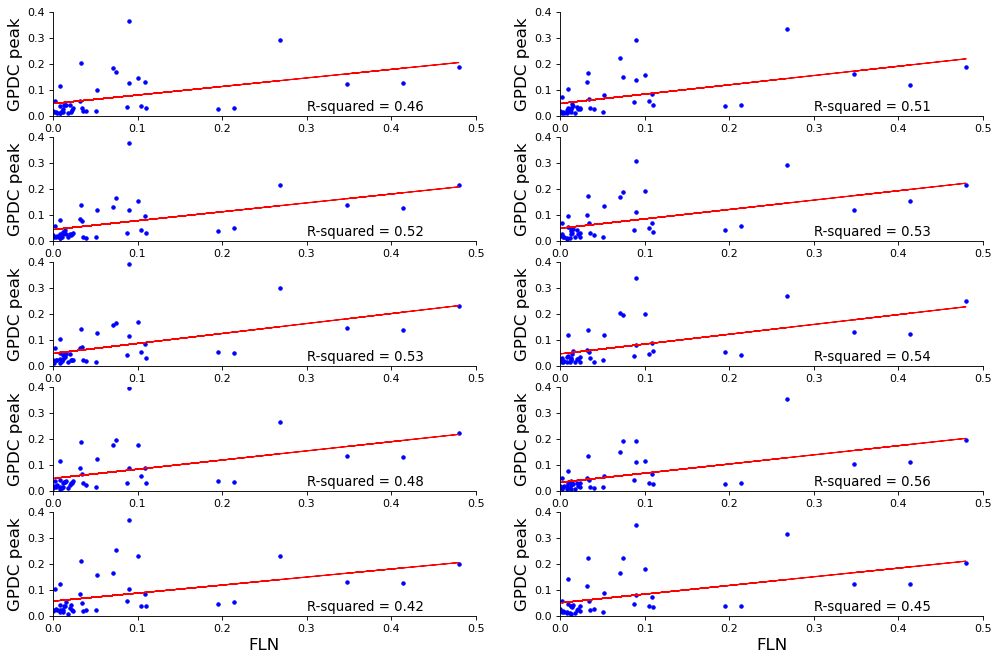

In [9]:
fig=plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# create data structure for scatter plot

# correlation
listCorrelationVisualCluster=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    listFln=[]
    listGpdc=[]

    for i in range(7):
        for j in range(7):
            if i!=j:
                listFln.append(flnVisual[i,j])
                listGpdc.append(gpdcMatrixVisual[i,j,seed])

    # Plot scatter plot
    plt.subplot(5,2,seed+1) 
    plt.plot(listFln,listGpdc,'.b')
    
    # # linear regression
    X = np.array(listFln)
    y = np.array(listGpdc)
    X = X.reshape(len(X), 1)
    y = y.reshape(len(y), 1)
    reg = LinearRegression().fit(X, y) 
    plt.plot(X, reg.predict(X), color='red', linewidth=1)
    plt.text(0.3, 0.02, 'R-squared = %0.2f' % np.sqrt(r2_score(y, reg.predict(X))),fontsize=12)
    plt.ylabel('GPDC peak',fontsize=15)
    plt.xlabel('FLN',fontsize=15)
    plt.ylim([0, 0.4])
    plt.xlim([0, 0.5])

    listCorrelationVisualCluster.append(np.sqrt(r2_score(y, reg.predict(X))))

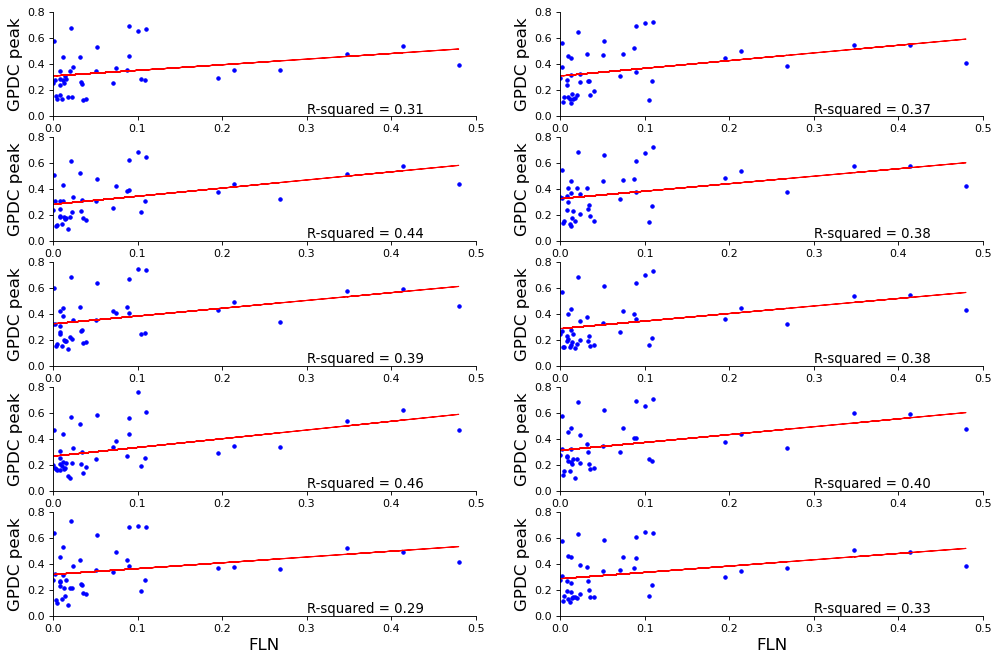

In [10]:
fig=plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# create data structure for scatter plot

# correlation
listCorrelationVisualPair=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    listFln=[]
    listGpdc=[]

    for i in range(7):
        for j in range(7):
            if i!=j:
                listFln.append(flnVisual[i,j])
                listGpdc.append(gpdcPairVisual[i,j,seed])

    # Plot scatter plot
    plt.subplot(5,2,seed+1) 
    plt.plot(listFln,listGpdc,'.b')
    
    # # linear regression
    X = np.array(listFln)
    y = np.array(listGpdc)
    X = X.reshape(len(X), 1)
    y = y.reshape(len(y), 1)
    reg = LinearRegression().fit(X, y) 
    plt.plot(X, reg.predict(X), color='red', linewidth=1)
    plt.text(0.3, 0.02, 'R-squared = %0.2f' % np.sqrt(r2_score(y, reg.predict(X))),fontsize=12)
    plt.ylabel('GPDC peak',fontsize=15)
    plt.xlabel('FLN',fontsize=15)
    plt.ylim([0, 0.8])
    plt.xlim([0, 0.5])

    listCorrelationVisualPair.append(np.sqrt(r2_score(y, reg.predict(X))))

([<matplotlib.axis.YTick at 0x7f9ffb59ec50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

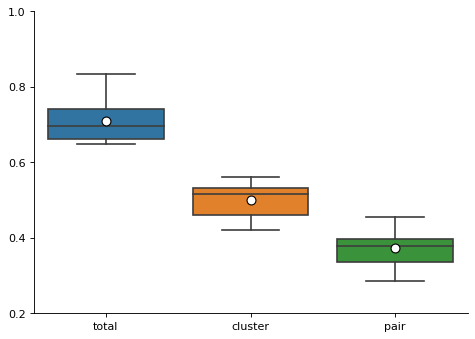

In [11]:
fig=plt.figure(figsize=(7,5), dpi= 80, facecolor='w', edgecolor='k')
dfVisual=pd.DataFrame({'total':listCorrelationVisualTotal,'cluster':listCorrelationVisualCluster,'pair':listCorrelationVisualPair})
sns.boxplot(data=dfVisual,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})
plt.yticks([0.2,0.4,0.6,0.8,1.0])

In [13]:
np.mean(listCorrelationVisualCluster)

0.4986345631606466

## Gpdc frontoparietal

In [14]:
# Gpdc (Downsample 1kHz)
gpdcMatrixFronto=np.zeros((7,7,10)) #(i->j)

Seeds=10
for i in range(Seeds):
    # GPDC
    dataFronto = np.load(pathData+'/Seed'+str(i+1)+'/gpdc_frontoparietal.npz')
    gpdcMatrixFronto[:,:,i]=dataFronto['arr_0']    # Não precisa inverter


In [15]:
areasFronto=dataFronto['arr_2']

# Define FLN visual

flnFronto=fln[areasFronto,:]
flnFronto=flnFronto[:,areasFronto]

# Define GPDC total visual

gpdcTotalFronto=gpdcMatrixTotal[areasFronto,:,:]
gpdcTotalFronto=gpdcTotalFronto[:,areasFronto,:]

# Define GPDC pair visual

gpdcPairFronto=gpdcMatrixPair[areasFronto,:,:]
gpdcPairFronto=gpdcPairFronto[:,areasFronto,:]


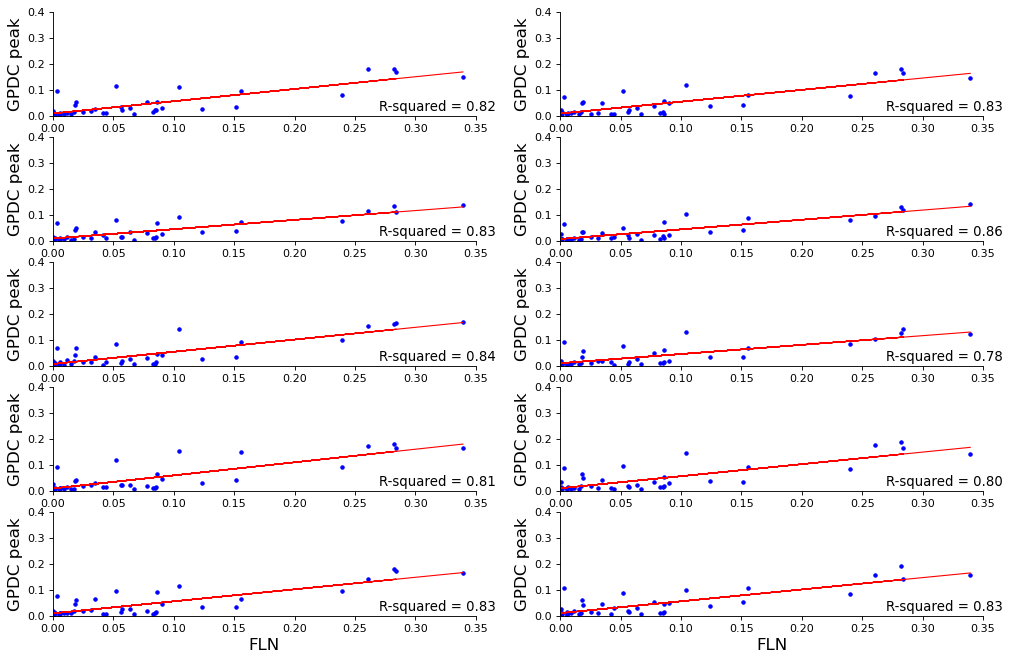

In [16]:
fig=plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# create data structure for scatter plot

# correlation
listCorrelationFrontoTotal=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    listFln=[]
    listGpdc=[]

    for i in range(7):
        for j in range(7):
            if i!=j:
                listFln.append(flnFronto[i,j])
                listGpdc.append(gpdcTotalFronto[i,j,seed])

    # Plot scatter plot
    plt.subplot(5,2,seed+1) 
    plt.plot(listFln,listGpdc,'.b')
    
    # # linear regression
    X = np.array(listFln)
    y = np.array(listGpdc)
    X = X.reshape(len(X), 1)
    y = y.reshape(len(y), 1)
    reg = LinearRegression().fit(X, y) 
    plt.plot(X, reg.predict(X), color='red', linewidth=1)
    plt.text(0.27, 0.02, 'R-squared = %0.2f' % np.sqrt(r2_score(y, reg.predict(X))),fontsize=12)
    plt.ylabel('GPDC peak',fontsize=15)
    plt.xlabel('FLN',fontsize=15)
    plt.ylim([0, 0.4])
    plt.xlim([0, 0.35])

    listCorrelationFrontoTotal.append(np.sqrt(r2_score(y, reg.predict(X))))

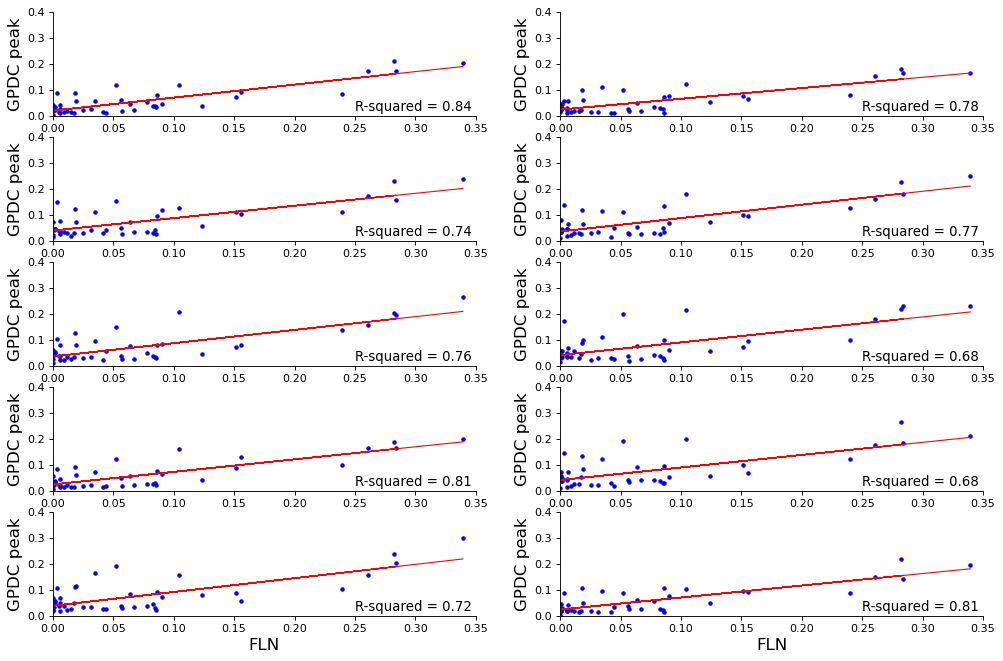

In [17]:
fig=plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# create data structure for scatter plot

# correlation
listCorrelationFrontoCluster=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    listFln=[]
    listGpdc=[]

    for i in range(7):
        for j in range(7):
            if i!=j:
                listFln.append(flnFronto[i,j])
                listGpdc.append(gpdcMatrixFronto[i,j,seed])

    # Plot scatter plot
    plt.subplot(5,2,seed+1) 
    plt.plot(listFln,listGpdc,'.b')
    
    # # linear regression
    X = np.array(listFln)
    y = np.array(listGpdc)
    X = X.reshape(len(X), 1)
    y = y.reshape(len(y), 1)
    reg = LinearRegression().fit(X, y) 
    plt.plot(X, reg.predict(X), color='red', linewidth=1)
    plt.text(0.25, 0.02, 'R-squared = %0.2f' % np.sqrt(r2_score(y, reg.predict(X))),fontsize=12)
    plt.ylabel('GPDC peak',fontsize=15)
    plt.xlabel('FLN',fontsize=15)
    plt.ylim([0, 0.4])
    plt.xlim([0, 0.35])

    listCorrelationFrontoCluster.append(np.sqrt(r2_score(y, reg.predict(X))))

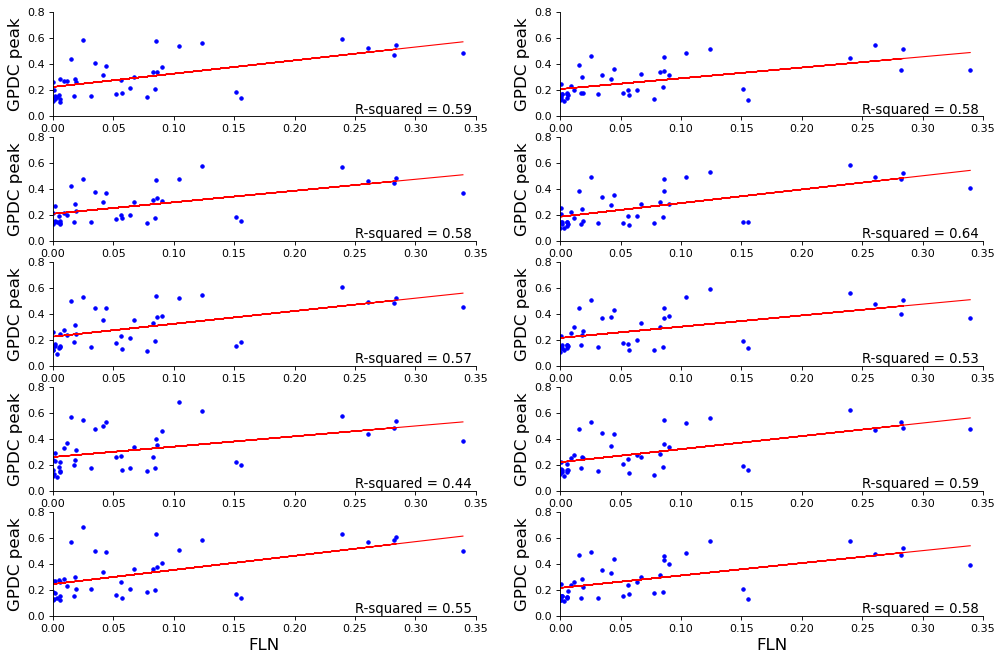

In [18]:
fig=plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# create data structure for scatter plot

# correlation
listCorrelationFrontoPair=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    listFln=[]
    listGpdc=[]

    for i in range(7):
        for j in range(7):
            if i!=j:
                listFln.append(flnFronto[i,j])
                listGpdc.append(gpdcPairFronto[i,j,seed])

    # Plot scatter plot
    plt.subplot(5,2,seed+1) 
    plt.plot(listFln,listGpdc,'.b')
    
    # # linear regression
    X = np.array(listFln)
    y = np.array(listGpdc)
    X = X.reshape(len(X), 1)
    y = y.reshape(len(y), 1)
    reg = LinearRegression().fit(X, y) 
    plt.plot(X, reg.predict(X), color='red', linewidth=1)
    plt.text(0.25, 0.02, 'R-squared = %0.2f' % np.sqrt(r2_score(y, reg.predict(X))),fontsize=12)
    plt.ylabel('GPDC peak',fontsize=15)
    plt.xlabel('FLN',fontsize=15)
    plt.ylim([0, 0.8])
    plt.xlim([0, 0.35])

    listCorrelationFrontoPair.append(np.sqrt(r2_score(y, reg.predict(X))))

([<matplotlib.axis.YTick at 0x7f9ff9e0fb10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

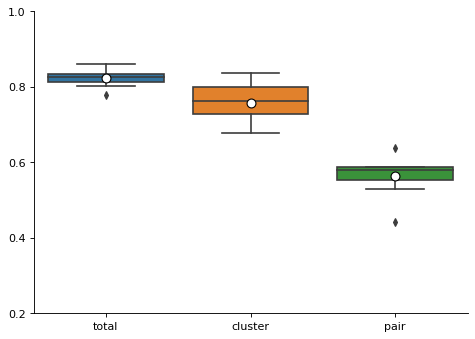

In [19]:
fig=plt.figure(figsize=(7,5), dpi= 80, facecolor='w', edgecolor='k')
dfFronto=pd.DataFrame({'total':listCorrelationFrontoTotal,'cluster':listCorrelationFrontoCluster,'pair':listCorrelationFrontoPair})
sns.boxplot(data=dfFronto,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})
plt.yticks([0.2,0.4,0.6,0.8,1.0])

In [20]:
np.mean(listCorrelationFrontoCluster)

0.7576287857331938